In [1]:
print("Notebook is working!")

Notebook is working!


In [2]:
1 + 1

2

In [1]:
import pandas as pd

df = pd.read_csv("insurance_data.csv")
df.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [3]:
employee_df = pd.read_csv("employee_data.csv")
vendor_df = pd.read_csv("vendor_data.csv")

In [1]:
import pandas as pd

insurance_df = pd.read_csv("insurance_data.csv")
employee_df = pd.read_csv("employee_data.csv")
vendor_df   = pd.read_csv("vendor_data.csv")

print("Insurance:", insurance_df.shape)
print("Employee:", employee_df.shape)
print("Vendor:", vendor_df.shape)

Insurance: (10000, 38)
Employee: (1200, 10)
Vendor: (600, 7)


In [2]:
insurance_df.columns

Index(['TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
       'POLICY_EFF_DT', 'LOSS_DT', 'REPORT_DT', 'INSURANCE_TYPE',
       'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1',
       'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'SSN',
       'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS',
       'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE',
       'SOCIAL_CLASS', 'ROUTING_NUMBER', 'ACCT_NUMBER',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY',
       'AGENT_ID', 'VENDOR_ID'],
      dtype='object')

In [3]:
insurance_df["CLAIM_STATUS"].value_counts()

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

df = insurance_df.copy()

# Drop ID / non-useful columns
drop_cols = [
    'TXN_DATE_TIME', 'TRANSACTION_ID', 'CUSTOMER_ID', 'POLICY_NUMBER',
    'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2',
    'ROUTING_NUMBER', 'ACCT_NUMBER', 'SSN'
]
df = df.drop(columns=drop_cols)

# Target encoding: A=0, D=1
df['CLAIM_STATUS'] = df['CLAIM_STATUS'].map({'A': 0, 'D': 1})

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Features & target
X = df.drop('CLAIM_STATUS', axis=1)
y = df['CLAIM_STATUS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1899
           1       0.00      0.00      0.00       101

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000



C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model_balanced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight={0: 1, 1: 5}  # punish missing fraud more
)

model_balanced.fit(X_train, y_train)

y_pred_bal = model_balanced.predict(X_test)

print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1899
           1       0.00      0.00      0.00       101

    accuracy                           0.95      2000
   macro avg       0.47      0.50      0.49      2000
weighted avg       0.90      0.95      0.92      2000



C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\tanvi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [6]:
insurance_df["CLAIM_STATUS"].value_counts(normalize=True)

CLAIM_STATUS
A    0.9497
D    0.0503
Name: proportion, dtype: float64

In [7]:
import numpy as np
np.unique(y_pred_bal, return_counts=True)

(array([0]), array([2000]))

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1899
           1       0.07      0.05      0.06       101

    accuracy                           0.92      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.91      0.92      0.91      2000



In [12]:
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced_subsample'
)

model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1899
           1       0.08      0.05      0.06       101

    accuracy                           0.92      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.91      0.92      0.91      2000



In [13]:
y_proba = model.predict_proba(X_test)[:, 1]

y_pred_custom = (y_proba > 0.25).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87      1899
           1       0.07      0.28      0.11       101

    accuracy                           0.77      2000
   macro avg       0.51      0.53      0.49      2000
weighted avg       0.91      0.77      0.83      2000



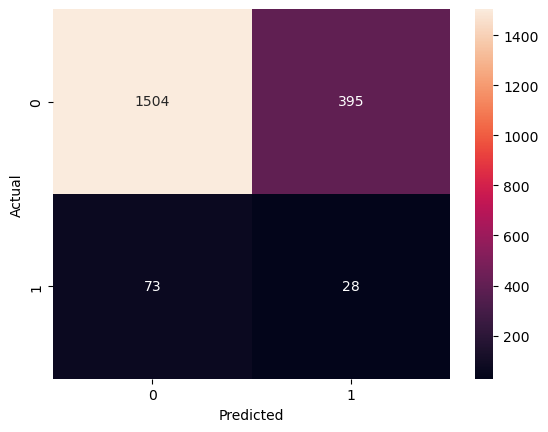

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
# Check missing values
df.isnull().sum()

POLICY_EFF_DT               0
LOSS_DT                     0
REPORT_DT                   0
INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
CITY                        0
STATE                       0
POSTAL_CODE                 0
MARITAL_STATUS              0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
SOCIAL_CLASS                0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_STATE              0
INCIDENT_CITY               0
INCIDENT_HOUR_OF_THE_DAY    0
AGENT_ID                    0
VENDOR_ID                   0
dtype: int64

In [16]:
df.isnull().sum()

POLICY_EFF_DT               0
LOSS_DT                     0
REPORT_DT                   0
INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
CITY                        0
STATE                       0
POSTAL_CODE                 0
MARITAL_STATUS              0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
SOCIAL_CLASS                0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_STATE              0
INCIDENT_CITY               0
INCIDENT_HOUR_OF_THE_DAY    0
AGENT_ID                    0
VENDOR_ID                   0
dtype: int64

In [17]:
Q1 = df['CLAIM_AMOUNT'].quantile(0.25)
Q3 = df['CLAIM_AMOUNT'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['CLAIM_AMOUNT'] < lower) | (df['CLAIM_AMOUNT'] > upper)]
print("Outliers count:", outliers.shape[0])

Outliers count: 920


In [18]:
# Cap outliers instead of removing them (better for fraud detection)
df['CLAIM_AMOUNT'] = df['CLAIM_AMOUNT'].clip(lower, upper)

# Optional: quick sanity check
print(df['CLAIM_AMOUNT'].min(), df['CLAIM_AMOUNT'].max())

100 49500
